# Load and save networks
Bayesian networks can be stored and loaded from the BayesianNetwork class or using the classes of the io subpackage ('BIF', 'AdjacencyMatrix', 'GEXF').

## Using BayesianNetwork class
The network can be read or written using `load` and `save` methods, respectively. Some formats save or load the full Bayesian network and some others can only handle the structure.

### Full network
There are two formats that manage the full network: JSON and `pgmpy` BIF. The last one is only available in the discrete case.

In [3]:
import sys 
sys.path.append("/home/javier/Documents/master/tfm/neurogenpy")
from neurogenpy import BayesianNetwork
from networkx import DiGraph

graph = DiGraph()
graph.add_edge('A', 'C')
graph.add_edge('B', 'C')
graph.add_edge('D', 'E')
parameters = {'A': {'uncond_mean': 4, 'cond_var': 3, 'parents_coeffs': [], 'parents': []}, 
              'B': {'uncond_mean': 5, 'cond_var': 1, 'parents_coeffs': [], 'parents': []},
              'C': {'uncond_mean': 3, 'cond_var': 2, 'parents_coeffs': [-0.2, 0.5], 'parents': ['A', 'B']},
              'D': {'uncond_mean': 2, 'cond_var': 1, 'parents_coeffs': [], 'parents': []},
              'E': {'uncond_mean': 1, 'cond_var': 0.5, 'parents_coeffs': [0.7], 'parents': ['D']}}

bn = BayesianNetwork(graph=graph, parameters=parameters, data_type='continuous')

bn.save('bn.json')

bn2 = BayesianNetwork().load('bn.json')

print('Some checking:')
print(bn2.get_cpds(['C']))

Some checking:
{'C': {'uncond_mean': 3.0, 'cond_var': 2.0, 'parents_coeffs': [-0.20000000000000004, 0.5], 'parents': ['A', 'B']}}


### Network structure
In the case of a GEXF, CSV, or Apache Parquet file, it only loads the graph structure of the network. In the GEXF case, a `layout_name` argument in `save` allows the user to determine how the positions of the nodes are stored in the file. Loading a GEXF file also keep the positions written in the file, but the user should be careful because `draw` function from `NetworkX` do not take them into account. In the following example, we save a graph using circular layout and show the visualization obtained with `draw` after loading it.

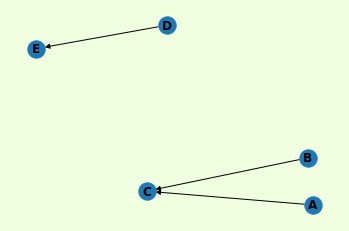

In [4]:
bn.save('bn.gexf', layout_name='circular')

bn2 = BayesianNetwork().load('bn.gexf')

import matplotlib.pyplot as plt
import networkx as nx

fig, ax = plt.subplots()
nx.draw(bn.graph, with_labels=True, font_weight='bold')

ax.set_facecolor('#f0ffe0')
ax.axis('off')
fig.set_facecolor('#f0ffe0')
plt.show()

The display obtained is not the desired one. We would expect something like the following graph. It was drawn by Sigma.js reading the stored GEXF file.

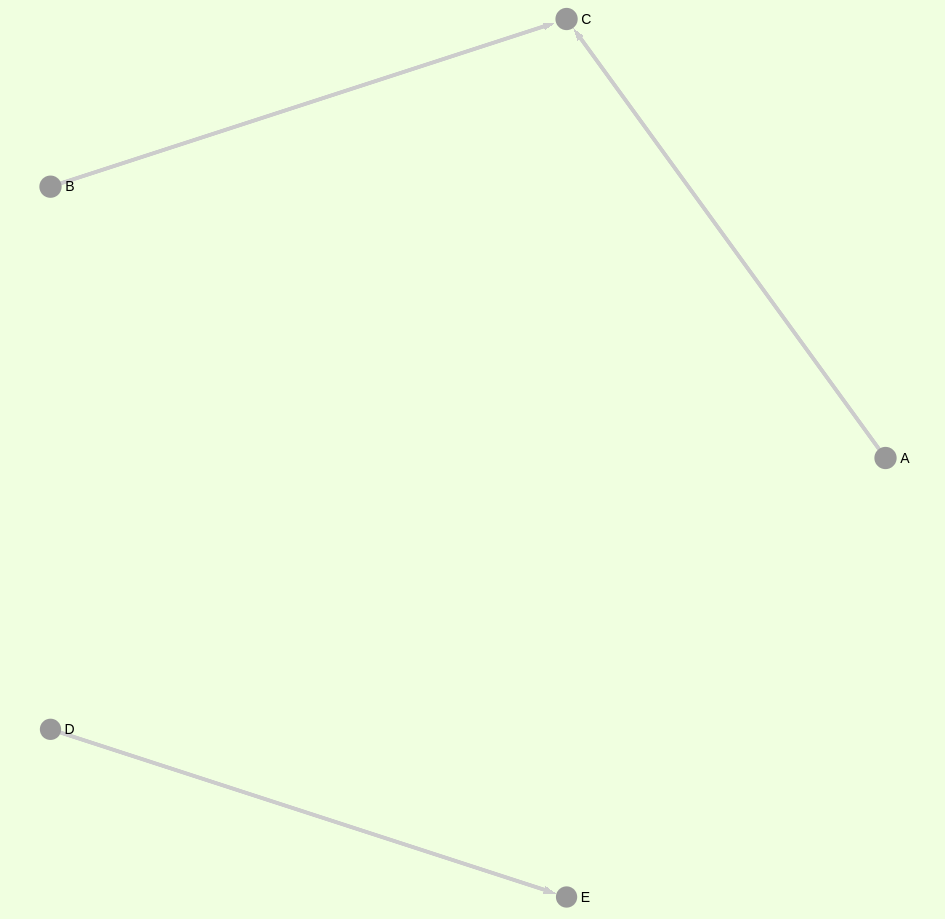

An option to make it work with `NetworkX` could be using a layout object, running the layout and passing the result to the `draw` function.

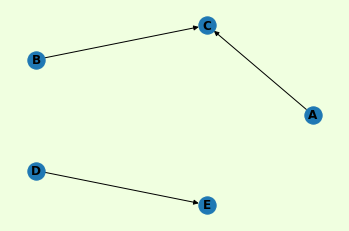

In [15]:
from neurogenpy.io import IgraphLayout

layout = IgraphLayout(bn.graph, layout_name='circular')
positions = layout.run()

fig, ax = plt.subplots()
nx.draw(bn.graph, pos=positions, with_labels=True, font_weight='bold')

ax.set_facecolor('#f0ffe0')
ax.axis('off')
fig.set_facecolor('#f0ffe0')
plt.show()

## Using io subpackage
It is also possible to instantiate a particular `io` class (`JSON`, `GEXF`, `AdjacencyMatrix` or `BIF`) and use `write_file` or `read_file` to load or save Bayesian networks. 

In [ ]:
from neurogenpy import GEXF, AdjacencyMatrix

writer = GEXF(bn)
writer.write_file(layout_name='circular', communities=True, sizes_method='neighbors')

reader = AdjacencyMatrix()
bn_structure = reader.read_file('bn_structure.csv')

Additionally, the `io` subpackage provides two other methods: `generate` and `convert`. The first one allows the user to get an input/output object from the Bayesian network and the second one to get a Bayesian network (or at least its structure) from an input/output object. In the GEXF and JSON case the input/output object is a string representation of the structure. In the AdjacencyMatrix case, it is a numpy array that represents it. We now show one example of each method.

In [3]:
from neurogenpy import JSON, GEXF

writer = GEXF(bn)

print('GEXF representation:')
print(writer.generate())

GEXF representation:
<gexf xmlns:viz="http://www.gexf.net/1.2draft/viz" xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.gexf.net/1.2draft http://www.gexf.net/1.2draft/gexf.xsd" version="1.2">
  <meta lastmodifieddate="2022-07-16">
    <creator>NetworkX 2.8.4</creator>
  </meta>
  <graph defaultedgetype="directed" mode="static" name="">
    <nodes>
      <node id="A" label="A">
        <viz:size value="31.65" />
        <viz:position x="58.53169548885461" y="30.0" z="0" />
      </node>
      <node id="C" label="C">
        <viz:size value="31.65" />
        <viz:position x="36.735419648693785" y="60.0" z="0" />
      </node>
      <node id="B" label="B">
        <viz:size value="31.65" />
        <viz:position x="1.4683045111454014" y="48.54101966249685" z="0" />
      </node>
      <node id="D" label="D">
        <viz:size value="31.1" />
        <viz:position x="1.4683045111453943" y="11.45898033750316" z="0" /

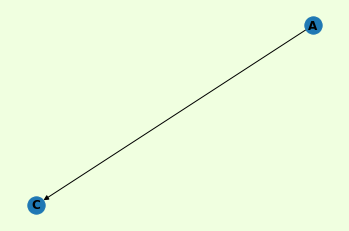

In [5]:
json_str = r"""{"graph": {"directed": true, "multigraph": false, "graph": {}, "nodes": [{"id": "A"}, {"id": "C"}], 
"links": [{"source": "A", "target": "C"}]}, 
"parameters": {
    "A": {"uncond_mean": 4, "cond_var": 3, "parents_coeffs": [], "parents": []}, 
    "C": {"uncond_mean": 3, "cond_var": 2, "parents_coeffs": [-0.2], "parents": ["A"]}}, 
"data_type": "continuous"}"""
reader = JSON()
bn2 = reader.convert(json_str)


fig, ax = plt.subplots()
nx.draw(bn2.graph, with_labels=True, font_weight='bold')

ax.set_facecolor('#f0ffe0')
ax.axis('off')
fig.set_facecolor('#f0ffe0')
plt.show()